In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
sys.path.append('./utils')  # so Python can find your custom modules

In [2]:
import matplotlib as mpl

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 16,
    "font.size": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
})

In [3]:
from utils.laplacian import laplacian
from utils.potential import Gravitational_potential_cuboid

#### Example 01

In [4]:
# Constants and point of evaluation
G = 1  # Gravitational constant
roh = 1  # Density
X_0, Y_0, Z_0 = 3, 3, 3
L, B, D = 2.0, 2.0, 2.0
x, y, z = 4, 4, 4

# Evaluate potential
V = Gravitational_potential_cuboid((x - X_0), (y - Y_0), (z - Z_0), L/2, B/2, D/2, roh, G)
print(f"The gravitational potential at point ({x}, {y}, {z}) is {V:.10e} m^2/s^2")


The gravitational potential at point (4, 4, 4) is 4.7601547280e+00 m^2/s^2


##### Example 02

In [5]:
# Constants
G = 1.0
roh = 1.0
X_0, Y_0, Z_0 = 3.0, 3.0, 3.0
L, B, D = 2.0, 2.0, 2.0
epsilon = 1e-10

# Semi-dimensions
a, b, c = L / 2, B / 2, D / 2

# Test points
test_points = [
    ((3.5, 3.5, 3.5), "Interior (centered below face ABCD)"),           # 1
    ((3.5, 3.5, 4.0), "On face ABCD"),                                  # 2
    ((3.5, 3.5, 4.0 + epsilon), "Exterior (above face by epsilon)"),   # 3
    ((3.5, 3.5, 4.0 - epsilon), "Interior (below face by epsilon)"),   # 4
    ((4.0, 4.0, 4.0), "On vertex B"),                                   # 5
    ((4.0, 4.0 + epsilon, 4.0), "On extended edge AB"),                 # 6
    ((4.0 + epsilon, 4.0, 4.0), "On extended edge CB"),                 # 7
    ((3.0, 5.0, 4.0), "On extended face ABCD"),                         # 8
    ((7.0, 7.0, 7.0), "Far exterior point"),                            # 9
    ((7.0 + epsilon, 7.0 + epsilon, 7.0 + epsilon), "Far exterior + eps") # 10
]

# Compute potentials
results = []
for (x, y, z), description in test_points:
    V = Gravitational_potential_cuboid(x - X_0, y - Y_0, z - Z_0, a, b, c, roh, G)
    results.append({
        "Test Point": f"({x:.10f}, {y:.10f}, {z:.10f})",
        "Potential Value": f"{V:.15e}",
        "Description": description
    })

# Create DataFrame
df = pd.DataFrame(results)

# Display
pd.set_option("display.max_colwidth", None)
print(df.to_string(index=False))


                                Test Point       Potential Value                         Description
(3.5000000000, 3.5000000000, 3.5000000000) 8.043586363964625e+00 Interior (centered below face ABCD)
(3.5000000000, 3.5000000000, 4.0000000000) 6.504625741605995e+00                        On face ABCD
(3.5000000000, 3.5000000000, 4.0000000001) 6.504625741151315e+00    Exterior (above face by epsilon)
(3.5000000000, 3.5000000000, 3.9999999999) 6.504625742060677e+00    Interior (below face by epsilon)
(4.0000000000, 4.0000000000, 4.0000000000) 4.760154727959110e+00                         On vertex B
(4.0000000000, 4.0000000001, 4.0000000000) 4.760154727765229e+00                 On extended edge AB
(4.0000000001, 4.0000000000, 4.0000000000) 4.760154727765229e+00                 On extended edge CB
(3.0000000000, 5.0000000000, 4.0000000000) 3.569191738087610e+00               On extended face ABCD
(7.0000000000, 7.0000000000, 7.0000000000) 1.154780286871126e+00                  Far exter

In [6]:
# Central difference gradient computation for gravitational potential
def compute_gradient(phi_func, x, y, z, h=1e-2):
    """Compute the gradient (gx, gy, gz) of the potential at (x, y, z) using central differences."""
    gx = (phi_func(x + h, y, z) - phi_func(x - h, y, z)) / (2 * h)
    gy = (phi_func(x, y + h, z) - phi_func(x, y - h, z)) / (2 * h)
    gz = (phi_func(x, y, z + h) - phi_func(x, y, z - h)) / (2 * h)
    return gx, gy, gz

# Use actual gravitational potential function
def phi(x, y, z):
    return Gravitational_potential_cuboid(x - X_0, y - Y_0, z - Z_0, L/2, B/2, D/2, roh, G)

# Compute potentials and gradients for test points
results_with_gradient = []

for (x, y, z), description in test_points:
    V = phi(x, y, z)
    gx, gy, gz = compute_gradient(phi, x, y, z)
    results_with_gradient.append({
        "Test Point": f"({x:.10f}, {y:.10f}, {z:.10f})",
        "Potential Value": f"{V:.15e}",
        "g_x": f"{gx:.15e}",
        "g_y": f"{gy:.15e}",
        "g_z": f"{gz:.15e}",
        "Description": description
    })

# Create updated DataFrame
df_grad = pd.DataFrame(results_with_gradient)

# Display
pd.set_option("display.max_colwidth", None)
print(df_grad.to_string(index=False))


                                Test Point       Potential Value                    g_x                    g_y                    g_z                         Description
(3.5000000000, 3.5000000000, 3.5000000000) 8.043586363964625e+00 -1.845778162369172e+00 -1.845778162369172e+00 -1.845778162369172e+00 Interior (centered below face ABCD)
(3.5000000000, 3.5000000000, 4.0000000000) 6.504625741605995e+00 -1.296479052953892e+00 -1.296479052953892e+00 -4.515510073496465e+00                        On face ABCD
(3.5000000000, 3.5000000000, 4.0000000001) 6.504625741151315e+00 -1.296479052819466e+00 -1.296479052819510e+00 -4.515510073568585e+00    Exterior (above face by epsilon)
(3.5000000000, 3.5000000000, 3.9999999999) 6.504625742060677e+00 -1.296479053088273e+00 -1.296479053088317e+00 -4.515510073424789e+00    Interior (below face by epsilon)
(4.0000000000, 4.0000000000, 4.0000000000) 4.760154727959110e+00 -1.930929097604839e+00 -1.930929097604883e+00 -1.930929097604883e+00                 

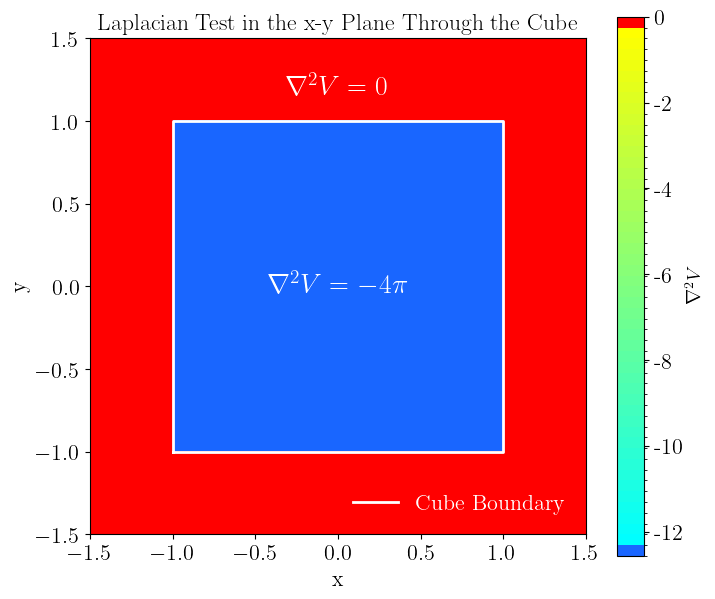

In [7]:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Constants and setup
G = 1
roh = 1
L, B, D = 2.0, 2.0, 2.0
X_0, Y_0, Z_0 = 0.0, 0.0, 0.0  # Center at origin
h = 0.00001
z_plane = Z_0

# Assume Gravitational_potential_cuboid(x, y, z, a, b, c, rho, G) and laplacian(phi, x, y, z, h) are defined

# Potential function
phi = lambda x, y, z: Gravitational_potential_cuboid(x - X_0, y - Y_0, z - Z_0, L/2, B/2, D/2, roh, G)

# 2D Grid for x-y plane
x_vals = np.linspace(X_0 - L * 0.75, X_0 + L * 0.75, 300)
y_vals = np.linspace(Y_0 - B * 0.75, Y_0 + B * 0.75, 300)
X, Y = np.meshgrid(x_vals, y_vals)
Z = z_plane

laplace_vals = np.zeros_like(X)

# Compute Laplacian at each grid point
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x, y = float(X[i, j]), float(Y[i, j])
        laplace_vals[i, j] = laplacian(phi, x, y, Z, h)

# Define 50 discrete colors
N = 50
# 1st color: bright blue
# Middle colors: interpolate between cyan and yellow
# Last color: bright red

# First color: blue
colors = [(0.1, 0.4, 1)]  # Blue

# Middle colors: cyan to yellow smoothly
for i in range(1, N-1):
    ratio = (i-1)/(N-3)
    r = ratio  # from 0 (cyan) to 1 (yellow: red=1, green=1, blue=0)
    g = 1.0
    b = 1.0 - ratio
    colors.append((r, g, b))

# Last color: red
colors.append((1, 0, 0))  # Red

# Create colormap
cmap_discrete = ListedColormap(colors)

# Define boundaries
vmin = -4 * np.pi  # ≈ -12.566
vmax = 0
bounds = np.linspace(vmin, vmax, N+1)
norm = BoundaryNorm(bounds, cmap_discrete.N)

# Plot
fig, ax = plt.subplots(figsize=(8, 7))

im = ax.imshow(laplace_vals, extent=(x_vals[0], x_vals[-1], y_vals[0], y_vals[-1]),
               origin='lower', cmap=cmap_discrete, norm=norm, interpolation='nearest')

# Colorbar
cbar = plt.colorbar(im, ax=ax, boundaries=bounds)

# Set ticks
tick_positions = [-12, -10, -8, -6, -4, -2, 0]
cbar.set_ticks(tick_positions)
cbar.set_ticklabels([str(t) for t in tick_positions])

# Label
cbar.set_label(r'$\nabla^2 V$', fontsize=14)

# Cuboid boundary (white)
x_min, x_max = X_0 - L/2, X_0 + L/2
y_min, y_max = Y_0 - B/2, Y_0 + B/2
ax.plot([x_min, x_max, x_max, x_min, x_min],
        [y_min, y_min, y_max, y_max, y_min],
        color='white', linewidth=2, label='Cube Boundary')

legend = ax.legend(loc='lower right', frameon=False)
for text in legend.get_texts():
    text.set_color('white')
    text.set_fontsize(16)

# Add text
ax.text(0, 0, r'$\nabla^2 V = -4\pi$', color='white', fontsize=20, ha='center', va='center', fontweight='bold')
outside_x = X_0 + L*0.6
outside_y = Y_0 + B*0.6
ax.text(0, outside_y, r'$\nabla^2 V = 0$', color='white', fontsize=20, ha='center', va='center', fontweight='bold')

# Titles and labels
ax.set_title("Laplacian Test in the x-y Plane Through the Cube", fontsize=17)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.grid(False)

# Save and show
plt.savefig("laplacian_plot.png", dpi=300, bbox_inches='tight')
plt.show()


In [8]:
import matplotlib as mpl

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 16,
    "font.size": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
})

In [9]:
def gravitational_acceleration_numerical(x, y, z, X_0, Y_0, Z_0, L, B, D, roh=1, G=1, h=1e-5):
    # Central differences for numerical gradient of potential
    def V(x_, y_, z_):
        return -Gravitational_potential_cuboid(x_ - X_0, y_ - Y_0, z_ - Z_0, L/2, B/2, D/2, roh, G)

    dV_dx = (V(x + h, y, z) - V(x - h, y, z)) / (2 * h)
    dV_dy = (V(x, y + h, z) - V(x, y - h, z)) / (2 * h)
    dV_dz = (V(x, y, z + h) - V(x, y, z - h)) / (2 * h)

    # Gravitational acceleration vector
    gx = -dV_dx
    gy = -dV_dy
    gz = -dV_dz
    return np.array([gx, gy, gz])

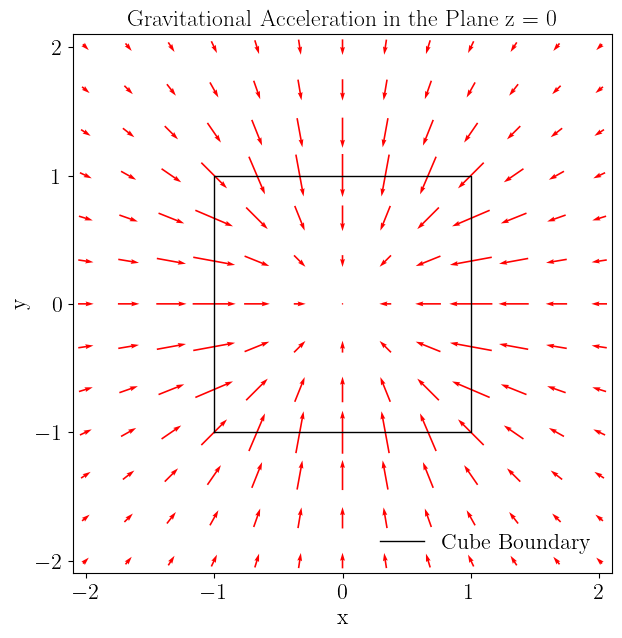

In [10]:
# Cube parameters
G = 1
roh = 1
X_0, Y_0, Z_0 = 0, 0, 0
L, B, D = 2.0, 2.0, 2.0

# Grid in z = 0 plane
x_vals = np.linspace(-2, 2, 13)
y_vals = np.linspace(-2, 2, 13)
X, Y = np.meshgrid(x_vals, y_vals)
U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        gx, gy, gz = gravitational_acceleration_numerical(X[i, j], Y[i, j], 0, X_0, Y_0, Z_0, L, B, D, roh, G)
        U[i, j] = gx
        V[i, j] = gy

# Plot
fig, ax = plt.subplots(figsize=(8, 7))
q = ax.quiver(X, Y, U, V, color='red', scale=65, pivot='middle', width=0.003)

# Cuboid boundary
x_min, x_max = X_0 - L/2, X_0 + L/2
y_min, y_max = Y_0 - B/2, Y_0 + B/2
ax.plot([x_min, x_max, x_max, x_min, x_min],
        [y_min, y_min, y_max, y_max, y_min],
        color='black', linewidth=1, label='Cube Boundary')

# Legend with black text, no background
legend = ax.legend(loc='lower right', frameon=False)
for text in legend.get_texts():
    text.set_color('black')
    text.set_fontsize(16)

# Title, labels, and layout (all black text)
ax.set_title("Gravitational Acceleration in the Plane z = 0 ", fontsize=17, color='black')
ax.set_xlabel('x', fontsize=16, color='black')
ax.set_ylabel('y', fontsize=16, color='black')
ax.tick_params(axis='both', colors='black')

ax.set_xlim([-2.1, 2.1])
ax.set_ylim([-2.1, 2.1])
ax.set_xticks(np.arange(-2, 3, 1))
ax.set_yticks(np.arange(-2, 3, 1))
ax.set_aspect('equal')
ax.grid(False)

# Clean background: no black patch
# Save and show
plt.savefig("Gravitational_Acceleration_quiver_z0.png", dpi=300, bbox_inches='tight')
plt.show()

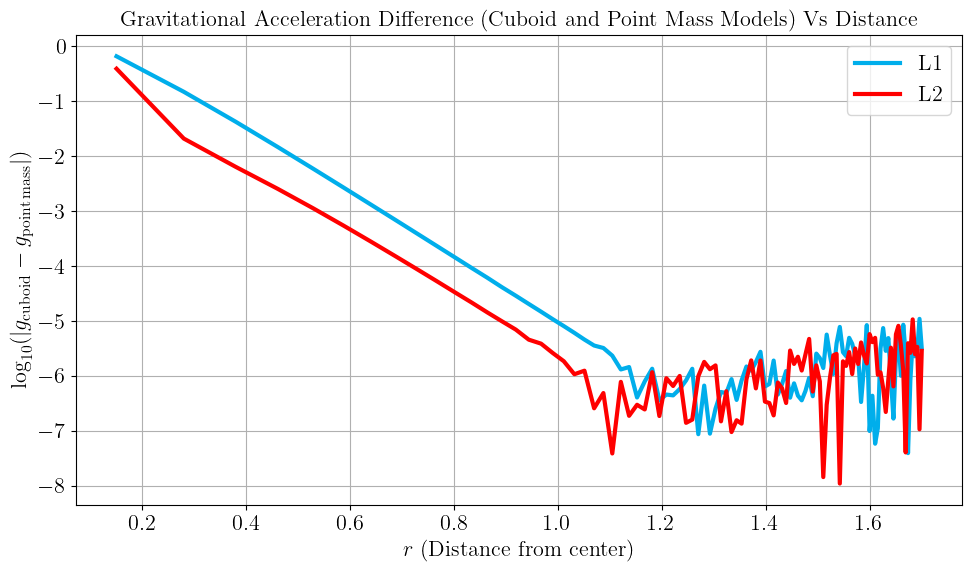

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 1.0
roh = 1.0
L, B, D = 2.0, 2.0, 2.0
X_0, Y_0, Z_0 = 0.0, 0.0, 0.0
z_plane = 0.0


# Potential function
def phi(x, y, z):
    return Gravitational_potential_cuboid(x - X_0, y - Y_0, z - Z_0, L/2, B/2, D/2, roh, G)

# Gradient of potential
def compute_gradient(phi_func, x, y, z, h=1e-7):
    gx = (phi_func(x + h, y, z) - phi_func(x - h, y, z)) / (2 * h)
    gy = (phi_func(x, y + h, z) - phi_func(x, y - h, z)) / (2 * h)
    gz = (phi_func(x, y, z + h) - phi_func(x, y, z - h)) / (2 * h)
    return gx, gy, gz

# Mass of cuboid
mass_cuboid = roh * L * B * D

# Gravity due to point mass
def gravity_point_mass(x, y, z):
    r_vec = np.array([x - X_0, y - Y_0, z - Z_0])
    r = np.linalg.norm(r_vec)
    if r == 0:
        return np.array([0.0, 0.0, 0.0])
    g = -G * mass_cuboid / r**3 * r_vec
    return g

# Define r values from sqrt(2) to 10
n_points = 100
r_vals = np.linspace(np.sqrt(2), 50, n_points)

# Line 1: along y-axis (x=0, varying y)
test_points_y = [(0.0, r, 0.0) for r in r_vals]

# Line 2: along diagonal (x=y, z=0)
test_points_diag = [(r/np.sqrt(2), r/np.sqrt(2), 0.0) for r in r_vals]

# Storage
delta_g_y = []
delta_g_diag = []

# Compute along y-axis
for (x, y, z) in test_points_y:
    gx_cub, gy_cub, gz_cub = compute_gradient(phi, x, y, z)
    g_cub = np.sqrt(gx_cub**2 + gy_cub**2 + gz_cub**2)

    g_vec_pm = gravity_point_mass(x, y, z)
    g_pm = np.linalg.norm(g_vec_pm)

    delta_g = np.abs(g_cub - g_pm)
    delta_g_y.append(delta_g)

# Compute along diagonal
for (x, y, z) in test_points_diag:
    gx_cub, gy_cub, gz_cub = compute_gradient(phi, x, y, z)
    g_cub = np.sqrt(gx_cub**2 + gy_cub**2 + gz_cub**2)

    g_vec_pm = gravity_point_mass(x, y, z)
    g_pm = np.linalg.norm(g_vec_pm)

    delta_g = np.abs(g_cub - g_pm)
    delta_g_diag.append(delta_g)

# Plot
plt.figure(figsize=(10, 6))

# Plot cuboid delta_g_y (blue line)
plt.plot(np.log10(r_vals), np.log10(delta_g_y), label='L1', linewidth=3, color=(0/255, 174/255, 235/255))

# Plot cuboid delta_g_diag (red line)
plt.plot(np.log10(r_vals), np.log10(delta_g_diag), label='L2', linewidth=3, color=(1.0, 0.0, 0.0))

# Custom x-ticks: sqrt(2), 2, 4, 6, 8, 10
#tick_positions = [np.sqrt(2), 2, 4, 6, 8, 10]
#tick_labels = [r'$\sqrt{2}$', '2', '4', '6', '8', '10']
#plt.xticks(tick_positions, tick_labels, fontsize=16)
#plt.yticks(fontsize=16)

# Labels and Title
plt.xlabel(r'$r$ (Distance from center)' , fontsize=16)
plt.ylabel(r'$\log_{10}(|g_{\mathrm{cuboid}} - g_{\mathrm{point\,mass}}|)$', fontsize=16)
plt.title('Gravitational Acceleration Difference (Cuboid and Point Mass Models) Vs Distance', fontsize=16)

# Legend
plt.legend(fontsize=16)

# Grid
plt.grid(True)

# Layout and save
plt.tight_layout()
plt.savefig("gravity_difference_vs_r_symbolic_ticks_final.png", dpi=300)
plt.show()


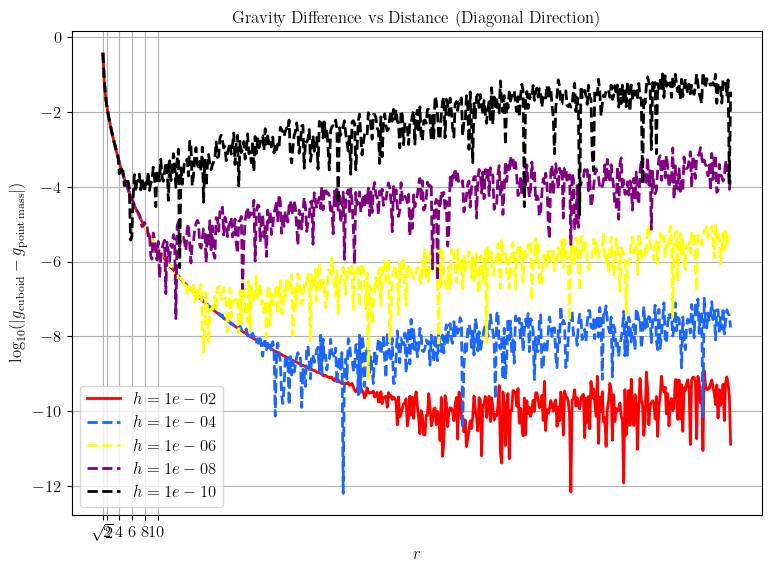

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 1.0
roh = 1.0
L, B, D = 2.0, 2.0, 2.0
X_0, Y_0, Z_0 = 0.0, 0.0, 0.0
z_plane = 0.0

# Assume Gravitational_potential_cuboid(x, y, z, a, b, c, rho, G) is defined

# Potential function
def phi(x, y, z):
    return Gravitational_potential_cuboid(x - X_0, y - Y_0, z - Z_0, L/2, B/2, D/2, roh, G)

# Gradient of potential
def compute_gradient(phi_func, x, y, z, h):
    gx = (phi_func(x + h, y, z) - phi_func(x - h, y, z)) / (2 * h)
    gy = (phi_func(x, y + h, z) - phi_func(x, y - h, z)) / (2 * h)
    gz = (phi_func(x, y, z + h) - phi_func(x, y, z - h)) / (2 * h)
    return gx, gy, gz

# Mass of cuboid
mass_cuboid = roh * L * B * D

# Gravity due to point mass
def gravity_point_mass(x, y, z):
    r_vec = np.array([x - X_0, y - Y_0, z - Z_0])
    r = np.linalg.norm(r_vec)
    if r == 0:
        return np.array([0.0, 0.0, 0.0])
    g = -G * mass_cuboid / r**3 * r_vec
    return g

# Define r values from sqrt(2) to 10
n_points = 500
r_vals = np.linspace(np.sqrt(2), 100, n_points)

# Along diagonal (x=y, z=0)
test_points_diag = [(r/np.sqrt(2), r/np.sqrt(2), 0.0) for r in r_vals]

# Step sizes and plot styles
step_sizes = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10]
colors = [(1, 0, 0), (0.1, 0.4, 1), (1, 1, 0), (0.5, 0, 0.5), (0, 0, 0)]  # Red, Custom Blue, Yellow, Purple, Black
linestyles = ['-', '--', '--', '--', '--']  # Solid for first, dashed for others

# Begin plot
plt.figure(figsize=(8, 6))

for h, color, style in zip(step_sizes, colors, linestyles):
    delta_g_diag = []

    for (x, y, z) in test_points_diag:
        gx_cub, gy_cub, gz_cub = compute_gradient(phi, x, y, z, h=h)
        g_cub = np.sqrt(gx_cub**2 + gy_cub**2 + gz_cub**2)

        g_vec_pm = gravity_point_mass(x, y, z)
        g_pm = np.linalg.norm(g_vec_pm)

        delta_g = np.abs(g_cub - g_pm)
        delta_g_diag.append(delta_g)

    # Plot for this step size
    plt.plot(r_vals, np.log10(delta_g_diag), label=f'$h={h:.0e}$', color=color, linestyle=style, linewidth=2)

# Custom x-ticks: sqrt(2), 2, 4, 6, 8, 10
tick_positions = [np.sqrt(2), 2, 4, 6, 8, 10]
tick_labels = [r'$\sqrt{2}$', '2', '4', '6', '8', '10']
plt.xticks(tick_positions, tick_labels, fontsize=12)
plt.yticks(fontsize=12)

# Labels and Title
plt.xlabel(r'$r$', fontsize=12)
plt.ylabel(r'$\log_{10}(|g_{\mathrm{cuboid}} - g_{\mathrm{point\,mass}}|)$', fontsize=12)
plt.title('Gravity Difference vs Distance (Diagonal Direction)', fontsize=12)

# Legend
plt.legend(fontsize=12)

# Grid
plt.grid(True)

# Layout and save
plt.tight_layout()
plt.savefig("gravity_difference_vs_r_step_comparison_final.png", dpi=300)
plt.show()


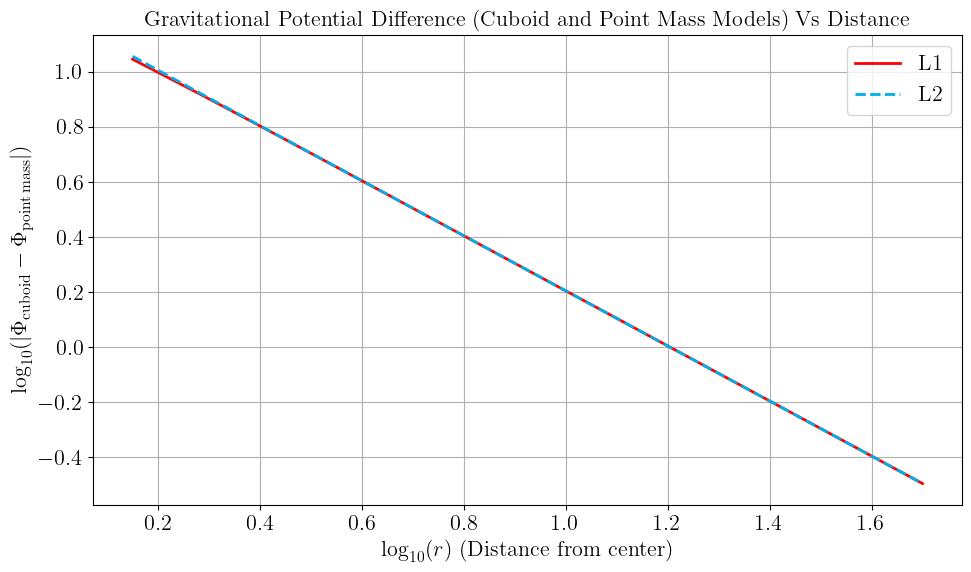

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 1.0
roh = 1.0
L, B, D = 2.0, 2.0, 2.0
X_0, Y_0, Z_0 = 0.0, 0.0, 0.0

# Assume Gravitational_potential_cuboid(x, y, z, a, b, c, rho, G) is defined

# Cuboid potential function
def phi(x, y, z):
    return Gravitational_potential_cuboid(x - X_0, y - Y_0, z - Z_0, L/2, B/2, D/2, roh, G)

# Mass of cuboid
mass_cuboid = roh * L * B * D

# Potential due to point mass
def potential_point_mass(x, y, z):
    r_vec = np.array([x - X_0, y - Y_0, z - Z_0])
    r = np.linalg.norm(r_vec)
    if r == 0:
        return 0.0  # At the center, potential should be finite in cuboid model, but infinite for point mass.
    phi_pm = -G * mass_cuboid / r
    return phi_pm

# Define r values from sqrt(2) to 50
n_points = 100
r_vals = np.linspace(np.sqrt(2), 50, n_points)

# Line 1: along y-axis (x=0, varying y)
test_points_y = [(0.0, r, 0.0) for r in r_vals]

# Line 2: along diagonal (x=y, z=0)
test_points_diag = [(r/np.sqrt(2), r/np.sqrt(2), 0.0) for r in r_vals]

# Storage
delta_phi_y = []
delta_phi_diag = []

# Compute along y-axis
for (x, y, z) in test_points_y:
    phi_cub = phi(x, y, z)
    phi_pm = potential_point_mass(x, y, z)
    delta_phi = np.abs(phi_cub - phi_pm)
    delta_phi_y.append(delta_phi)

# Compute along diagonal
for (x, y, z) in test_points_diag:
    phi_cub = phi(x, y, z)
    phi_pm = potential_point_mass(x, y, z)
    delta_phi = np.abs(phi_cub - phi_pm)
    delta_phi_diag.append(delta_phi)

# Plot
plt.figure(figsize=(10, 6))

# Plot potential differences
plt.plot(np.log10(r_vals), np.log10(delta_phi_y), label='L1', linewidth=2, color=(1.0, 0.0, 0.0))
plt.plot(np.log10(r_vals), np.log10(delta_phi_diag), label='L2',linestyle='--', linewidth=2, color=(0/255, 174/255, 235/255))

# Labels and Title
plt.xlabel(r'$\log_{10}(r)$ (Distance from center)', fontsize=16)
plt.ylabel(r'$\log_{10}(|\Phi_{\mathrm{cuboid}} - \Phi_{\mathrm{point\,mass}}|)$', fontsize=16)
plt.title('Gravitational Potential Difference (Cuboid and Point Mass Models) Vs Distance', fontsize=16)

# Legend
plt.legend(fontsize=16)

# Grid
plt.grid(True)

# Layout and save
plt.tight_layout()
plt.savefig("potential_difference_vs_r.png", dpi=300)
plt.show()


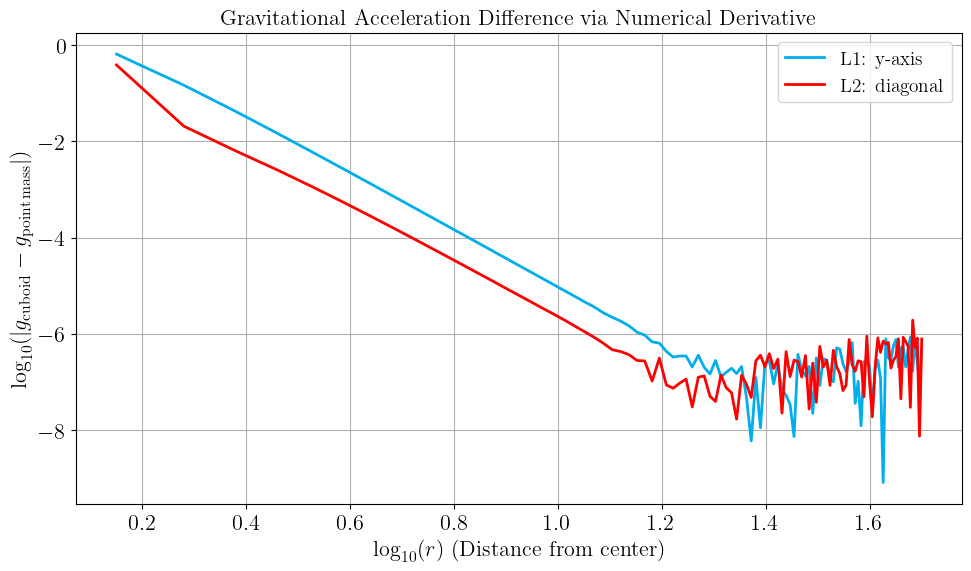

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 1.0
roh = 1.0
L, B, D = 2.0, 2.0, 2.0
X_0, Y_0, Z_0 = 0.0, 0.0, 0.0

# Define cuboid potential wrapper (centered at origin)
def phi(x, y, z):
    return Gravitational_potential_cuboid(
        x - X_0, y - Y_0, z - Z_0,
        L / 2, B / 2, D / 2, roh, G
    )

# Compute gradient using central finite difference (numerical derivative)
def compute_gradient(phi_func, x, y, z, h=1e-6):
    gx = (phi_func(x + h, y, z) - phi_func(x - h, y, z)) / (2 * h)
    gy = (phi_func(x, y + h, z) - phi_func(x, y - h, z)) / (2 * h)
    gz = (phi_func(x, y, z + h) - phi_func(x, y, z - h)) / (2 * h)
    return gx, gy, gz

# Mass of cuboid (same used in point mass model)
mass_cuboid = roh * L * B * D

# Gravitational acceleration magnitude due to point mass
def gravity_point_mass_magnitude(x, y, z):
    dx = x - X_0
    dy = y - Y_0
    dz = z - Z_0
    r_squared = dx**2 + dy**2 + dz**2
    if r_squared == 0.0:
        return 0.0  # Avoid singularity
    return G * mass_cuboid / r_squared

# Sample points along r from sqrt(2) to 50
n_points = 100
r_vals = np.linspace(np.sqrt(2), 50, n_points)

# Line 1: y-axis (x=0, z=0)
test_points_y = [(0.0, r, 0.0) for r in r_vals]

# Line 2: diagonal (x=y, z=0)
test_points_diag = [(r / np.sqrt(2), r / np.sqrt(2), 0.0) for r in r_vals]

# Storage for acceleration differences
delta_g_y = []
delta_g_diag = []

# Compute difference along y-axis
for (x, y, z) in test_points_y:
    gx, gy, gz = compute_gradient(phi, x, y, z)
    g_cub = np.sqrt(gx**2 + gy**2 + gz**2)

    g_pm = gravity_point_mass_magnitude(x, y, z)

    delta_g_y.append(np.abs(g_cub - g_pm))

# Compute difference along diagonal
for (x, y, z) in test_points_diag:
    gx, gy, gz = compute_gradient(phi, x, y, z)
    g_cub = np.sqrt(gx**2 + gy**2 + gz**2)

    g_pm = gravity_point_mass_magnitude(x, y, z)

    delta_g_diag.append(np.abs(g_cub - g_pm))

# Plot results
plt.figure(figsize=(10, 6))

# Plot delta_g_y (L1)
plt.plot(np.log10(r_vals), np.log10(delta_g_y), label='L1: y-axis', linewidth=2, color=(0/255, 174/255, 235/255))

# Plot delta_g_diag (L2)
plt.plot(np.log10(r_vals), np.log10(delta_g_diag), label='L2: diagonal', linewidth=2, color=(1.0, 0.0, 0.0))

# Axes labels
plt.xlabel(r'$\log_{10}(r)$ (Distance from center)', fontsize=16)
plt.ylabel(r'$\log_{10}(|g_{\mathrm{cuboid}} - g_{\mathrm{point\,mass}}|)$', fontsize=16)
plt.title('Gravitational Acceleration Difference via Numerical Derivative', fontsize=16)

# Legend and grid
plt.legend(fontsize=14)
plt.grid(True)

# Save and show
plt.tight_layout()
plt.savefig("acceleration_difference_numerical_vs_pointmass.png", dpi=300)
plt.show()
